<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Heat%20Transfer/ME421_HVAC_E20021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cooling Load Calculation for Milk Storage – Dairy Cool Room Design

## Problem Statement

A dairy factory receives milk from collecting centers in aluminum containers at approximately **14:00 hrs**. The milk arrives at temperatures between **35°C and 40°C**. The requirement is to cool the milk to **15°C within 2 hours** and maintain that temperature until delivery the next day at **1400 hrs**.

**Design Data:**
- Number of containers per day: **40**
- Empty container weight: **2 kg** (aluminum)
- Milk weight per container: **5 kg**
- Specific heat of milk: **4000 J/kg·K**
- Specific heat of aluminum container: **921.1 J/kg·K**

## Objective
Evaluate whether the available air conditioning unit in the Heat Engine Laboratory can meet the cooling requirement for 40 containers (and later assess scaling to 80 containers).

1.  Propose a methodology to evaluate the feasibility of the available unit.
2.  Conduct experiments with the laboratory cooling unit to obtain necessary performance data.
3.  Determine the developments or modifications required if the capacity is increased to store 80 milk containers per day.
4.  Compile a comprehensive report on the findings and engineering recommendations.

## System Parameters
- Number of containers ($n$): **40**
- Mass of milk per container ($m_m$): **5 kg**
- Mass of empty container ($m_c$): **2 kg**
- Specific heat of milk ($c_m$): **4000 J/kg·K**
- Specific heat of aluminum ($c_c$): **921.1 J/kg·K**
- Final (target) temperature ($T_f$): **15°C**
- Cooling duration ($t$): **2 hours = 7200 seconds**

## Case A: Average Initial Temperature ($T_i = 37.5°C$)

**Total heat to be removed ($Q$):**

$$
Q = n \times \left[ (m_m \cdot c_m + m_c \cdot c_c) \times (T_i - T_f) \right]
$$

$$
Q = 40 \times \left[ (5 \times 4000 + 2 \times 921.1) \times (37.5 - 15) \right]
$$

$$
Q = 40 \times (20{,}000 + 1{,}842.2) \times 22.5 = 19{,}657{,}980 \ \text{J} \approx 19.66 \ \text{MJ}
$$

**Required average cooling power:**

$$
\dot{Q}_\text{avg} = \frac{Q}{t} = \frac{19{,}657{,}980}{7200} \approx 2.73 \ \text{kW}
$$

## Case B: Worst-case Initial Temperature ($T_i = 40°C$)

**Total heat to be removed ($Q$):**

$$
Q = 40 \times \left[ (5 \times 4000 + 2 \times 921.1) \times (40 - 15) \right]
$$

$$
Q = 40 \times 21{,}842.2 \times 25 = 21{,}842{,}200 \ \text{J} \approx 21.84 \ \text{MJ}
$$

**Required average cooling power:**

$$
\dot{Q}_\text{max} = \frac{21{,}842{,}200}{7200} \approx 3.03 \ \text{kW}
$$

## Summary – Cooling Load (40 containers)

- **Average case** (37.5°C → 15°C): **~2.73 kW**
- **Worst case** (40°C → 15°C): **~3.03 kW**



In [1]:
# =============================================================================
# Dairy Milk Cooling Load Calculation – Heat Engine Laboratory Project
# =============================================================================

# Parameters from problem statement
n_containers     = 40          # Number of aluminum containers per day
m_container      = 2.0         # Empty container mass (kg)
m_milk           = 5.0         # Milk mass per container (kg)
cp_container     = 921.1       # Specific heat of aluminum (J/kg·K)
cp_milk          = 4000.0      # Specific heat of milk (J/kg·K)
t_target         = 15.0        # Desired final temperature (°C)
cooling_time_h   = 2.0         # Required cooling time (hours)

# Conversions
cooling_time_sec = cooling_time_h * 3600

# -----------------------------------------------------------------------------
# Function to calculate required cooling load (kW)
# -----------------------------------------------------------------------------
def calculate_cooling_load(t_initial):
    """
    Calculate the average cooling power required (kW) to cool milk + containers
    from t_initial to t_target in the given time.

    Returns: cooling load in kW
    """
    # Heat capacity per container (milk + aluminum)
    heat_cap_per_container = (m_milk * cp_milk) + (m_container * cp_container)

    # Temperature difference
    delta_t = t_initial - t_target

    # Total energy to remove (Joules)
    total_energy_j = n_containers * heat_cap_per_container * delta_t

    # Average power required (Watts)
    power_w = total_energy_j / cooling_time_sec

    # Convert to kW
    return power_w / 1000


# -----------------------------------------------------------------------------
# Calculate for the two main scenarios
# -----------------------------------------------------------------------------
t_avg = (35.0 + 40.0) / 2      # 37.5 °C
t_max = 40.0

load_avg_kw = calculate_cooling_load(t_avg)
load_max_kw = calculate_cooling_load(t_max)

# -----------------------------------------------------------------------------
# Results
# -----------------------------------------------------------------------------
print("══════════════════════════════════════════════════════════════")
print("        Cooling Load Calculation – 40 Containers")
print("══════════════════════════════════════════════════════════════")
print(f"Target temperature          : {t_target:.1f} °C")
print(f"Required cooling time       : {cooling_time_h:.1f} hours")
print(f"Number of containers        : {n_containers}")
print()
print(f"Scenario              Initial Temp    Required Load")
print(f"────────────────────  ──────────────  ───────────────")
print(f"Average case          37.5 °C         {load_avg_kw:6.3f} kW")
print(f"Worst-case (max)      40.0 °C         {load_max_kw:6.3f} kW")
print("══════════════════════════════════════════════════════════════")
print("\nNote: This is sensible cooling load only (milk + containers).")
print("      Add room heat gain, infiltration, fans, etc. for real design.")

══════════════════════════════════════════════════════════════
        Cooling Load Calculation – 40 Containers
══════════════════════════════════════════════════════════════
Target temperature          : 15.0 °C
Required cooling time       : 2.0 hours
Number of containers        : 40

Scenario              Initial Temp    Required Load
────────────────────  ──────────────  ───────────────
Average case          37.5 °C          2.730 kW
Worst-case (max)      40.0 °C          3.034 kW
══════════════════════════════════════════════════════════════

Note: This is sensible cooling load only (milk + containers).
      Add room heat gain, infiltration, fans, etc. for real design.


In [2]:
# Quick sensitivity check – try different numbers of containers or times
n_test = 40          # ← change this to test (e.g. 80)
time_h_test = 2.0    # ← change this to test

load_test_avg = calculate_cooling_load(t_avg) * (n_test / 40) * (2.0 / time_h_test)
load_test_max = calculate_cooling_load(t_max) * (n_test / 40) * (2.0 / time_h_test)

print(f"For {n_test} containers in {time_h_test:.1f} hours:")
print(f"  → Average case: {load_test_avg:.2f} kW")
print(f"  → Worst case:   {load_test_max:.2f} kW")

For 40 containers in 2.0 hours:
  → Average case: 2.73 kW
  → Worst case:   3.03 kW


# THEORY

## Experimental Methodology for Evaluating the Laboratory Cooling Unit

This procedure describes how to experimentally determine the **actual cooling capacity** ($\dot{Q}_{act}$) of the air conditioning unit in the Heat Engine Laboratory and assess whether it is suitable for cooling 40 milk containers from 35–40°C to 15°C within 2 hours.

### 1. Key Measurement Parameters

The following quantities must be measured:

- **Duct cross-section**  
  Width ($w$) and height ($h$) of the air intake duct → Area $A = w \times h$ (m²)

- **Air velocity ($v$)**  
  Measured using a vane or hot-wire anemometer at the intake. Take multiple points and average.

- **Psychrometric conditions** at two states:
  - **State 1 (Inlet)**: Ambient air entering the evaporator  
  - **State 2 (Outlet)**: Cooled air leaving the evaporator  
  Measured parameters at each state:
  - Dry bulb temperature ($T_{db}$) (°C)  
  - Wet bulb temperature ($T_{wb}$) (°C)  
  (Use a sling psychrometer or digital psychrometer)

### 2. Psychrometric Theory – Enthalpy Determination

The cooling capacity is based on the **total enthalpy difference** of moist air across the evaporator (sensible + latent cooling).

#### Step-by-step calculation of specific enthalpy ($h$ in kJ/kg dry air)

1. **Saturation vapor pressure at wet bulb temperature** (Magnus-Tetens approximation):
   $$
   P_{swb} = 0.61078 \exp\left( \frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3} \right) \quad \text{(kPa)}
   $$

2. **Actual vapor pressure** (accounting for psychrometric depression):
   $$
   P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})
   $$
   (Assume $P_{atm} = 101.325$ kPa if not measured)

3. **Humidity ratio** ($\omega$ – kg water vapor / kg dry air):
   $$
   \omega = 0.62194 \cdot \frac{P_v}{P_{atm} - P_v}
   $$

4. **Specific enthalpy** of moist air:
   $$
   h = c_{pa} \cdot T_{db} + \omega \cdot (h_{fg} + c_{pv} \cdot T_{db})
   $$
   Where:
   - $c_{pa} = 1.006$ kJ/kg·K (dry air)  
   - $c_{pv} = 1.86$ kJ/kg·K (water vapor)  
   - $h_{fg} = 2501$ kJ/kg (latent heat at 0°C)

Calculate $h_{in}$ (inlet) and $h_{out}$ (outlet).

### 3. Cooling Capacity Calculation

**Mass flow rate of dry air** ($\dot{m}_a$):
$$
\dot{m}_a = \rho \cdot A \cdot v \quad \text{(kg/s)}
$$
(Use $\rho \approx 1.18–1.20$ kg/m³ depending on temperature; 1.2 is typical at room conditions)

**Actual cooling capacity** ($\dot{Q}_{act}$):
$$
\dot{Q}_{act} = \dot{m}_a \times (h_{in} - h_{out}) \quad \text{(kW)}
$$
(Note: Enthalpy in kJ/kg → multiply by $\dot{m}_a$ in kg/s gives kW directly)

### 4. Data Recording Table

| Parameter                     | Symbol     | Unit     | Measured / Calculated |
|-------------------------------|------------|----------|------------------------|
| Duct area                     | $A$        | m²       |                        |
| Average air velocity          | $v$        | m/s      |                        |
| Air density (assumed/measured)| $\rho$     | kg/m³    |                        |
| Inlet dry bulb temp           | $T_{db,in}$| °C       |                        |
| Inlet wet bulb temp           | $T_{wb,in}$| °C       |                        |
| Outlet dry bulb temp          | $T_{db,out}$| °C      |                        |
| Outlet wet bulb temp          | $T_{wb,out}$| °C      |                        |
| Inlet enthalpy                | $h_{in}$   | kJ/kg    |                        |
| Outlet enthalpy               | $h_{out}$  | kJ/kg    |                        |
| **Actual cooling capacity**   | **$\dot{Q}_{act}$** | **kW** |                        |

### 5. Feasibility Decision Rule

Compare the measured capacity against the required load for 40 containers:

- **Required maximum load** (worst case, 40°C → 15°C): **3.03 kW**  
- **Decision criteria**:
  - If $\dot{Q}_{act} \geq 3.03$ kW → **Unit is suitable** (with margin)  
  - If $\dot{Q}_{act} < 3.03$ kW → **Unit is insufficient** → Modifications or additional cooling required



# OBSERVATIONS

## Experimental Data and Analysis of Fan Speed Performance

This section presents the experimental data collected at different evaporator **fan speeds**.  
The test was performed with the cold room door open to maintain relatively stable inlet air conditions while varying airflow rate. The goal was to identify the fan speed that provides maximum heat removal (cooling capacity).

### 1. Sensor and Measurement Nomenclature

- **D₁** : Internal diameter of return air duct (m) = **0.11 m**  
- **D₂** : Internal diameter of cool air supply duct (m) *(not provided in data)*  
- **T₁** : Return air dry bulb temperature (°C)  
- **T₂** : Return air wet bulb temperature (°C)  
- **T₃** : Evaporator inlet (mixed air) dry bulb temperature (°C)  
- **T₄** : Evaporator inlet wet bulb temperature (°C)  
- **T₅** : Evaporator exit (supply air) dry bulb temperature (°C)  
- **T₆** : Evaporator exit wet bulb temperature (°C)  
- **V_in**  : Average air velocity at intake/return duct (m/s)  
- **V_out** : Average air velocity at supply/exit duct (m/s)

**Note:** Velocity = 0.0 m/s at low fan speeds indicates airflow was too low to be reliably measured with the anemometer.

### 2. Recorded Experimental Data

| Fan Speed | T₁ (°C) | T₂ (°C) | T₃ (°C) | T₄ (°C) | T₅ (°C) | T₆ (°C) | V_in (m/s) | V_out (m/s) |
|-----------|---------|---------|---------|---------|---------|---------|------------|-------------|
| **1**     | 29.5    | 25.2    | 29.1    | 21.2    | 26.4    | 19.9    | 0.0        | 0.0         |
| **2**     | 29.5    | 25.3    | 29.1    | 21.1    | 26.7    | 20.0    | 0.0        | 0.0         |
| **3**     | 29.9    | 25.3    | 29.5    | 21.5    | 24.3    | 19.7    | 0.6        | 0.5         |
| **4**     | 30.0    | 24.9    | 29.6    | 21.8    | 20.4    | 16.6    | 2.8        | 2.6         |
| **5**     | 29.2    | 23.7    | 29.3    | 21.2    | 20.8    | 16.2    | 5.6        | 5.4         |
| **6**     | 29.2    | 23.3    | 29.3    | 21.1    | 21.4    | 18.0    | 8.8        | 8.1         |
| **7**     | 29.4    | 23.2    | 29.3    | 21.1    | 21.5    | 18.2    | 9.3        | 8.4         |
| **8**     | 29.0    | 23.1    | 29.1    | 21.0    | 21.2    | 17.6    | 9.6        | 8.5         |
| **9**     | 28.7    | 22.9    | 28.9    | 20.9    | 21.3    | 17.4    | 9.8        | 8.7         |
| **10**    | 29.4    | 23.2    | 29.3    | 21.1    | 19.9    | 16.5    | 9.5        | 9.1         |



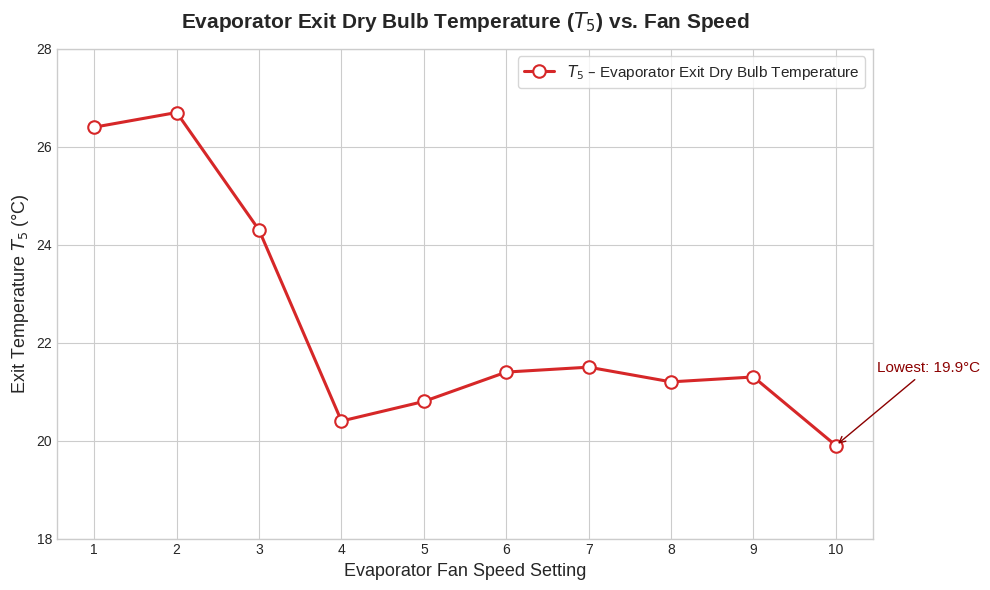

In [3]:
import matplotlib.pyplot as plt

# Experimental data from observations table
fan_speeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
t5_values  = [26.4, 26.7, 24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9]

# Create figure and axis with better size & style
plt.figure(figsize=(10, 6), dpi=100)
plt.style.use('seaborn-v0_8-whitegrid')   # clean modern look (optional - comment out if not wanted)

# Plot line + markers
plt.plot(fan_speeds, t5_values,
         marker='o',          # changed to circle for better visibility
         markersize=9,
         linewidth=2.2,
         color='tab:red',
         linestyle='-',
         markerfacecolor='white',
         markeredgecolor='tab:red',
         markeredgewidth=1.5)

# Titles and labels with LaTeX support
plt.title('Evaporator Exit Dry Bulb Temperature ($T_5$) vs. Fan Speed',
          fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Evaporator Fan Speed Setting', fontsize=13)
plt.ylabel('Exit Temperature $T_5$ (°C)', fontsize=13)

# Force integer x-ticks matching fan speeds
plt.xticks(fan_speeds)

# Improve y-axis range for better visibility of the trend
plt.ylim(18, 28)

# Add annotation for the lowest temperature point (interesting observation)
min_idx = t5_values.index(min(t5_values))
plt.annotate(f'Lowest: {t5_values[min_idx]}°C',
             xy=(fan_speeds[min_idx], t5_values[min_idx]),
             xytext=(fan_speeds[min_idx]+0.5, t5_values[min_idx]+1.5),
             fontsize=11,
             color='darkred',
             arrowprops=dict(arrowstyle='->', color='darkred'))

# Legend and grid
plt.legend(['$T_5$ – Evaporator Exit Dry Bulb Temperature'],
           loc='upper right', fontsize=11, frameon=True)

# Final touches
plt.tight_layout()

# Show the plot
plt.show()

# Experimental Analysis and Thermodynamic Logic

This section explains the mathematical framework used to determine the **actual cooling capacity** of the laboratory air conditioning unit from the measured data.

## 1. Mass Flow Rate of Air ($\dot{m}_a$)

The mass flow rate is the most critical parameter for quantifying heat transfer. It is calculated using the measured intake air velocity:

$$
\dot{m}_a = \rho \cdot A \cdot V_{in} \quad \text{(kg/s)}
$$

Where:
- $\rho$ ≈ **1.2 kg/m³** (typical air density at room conditions; can be adjusted if measured)
- $A$ = cross-sectional area of the return air duct (m²)  
  → $A = \pi \cdot (D_1 / 2)^2$ with $D_1 = 0.11$ m
- $V_{in}$ = average measured air velocity at intake (m/s)



## 2. Calculation of Specific Enthalpy ($h$)

The total cooling effect includes both **sensible** (temperature change) and **latent** (moisture removal) heat. Enthalpy is determined from dry bulb ($T_{db}$) and wet bulb ($T_{wb}$) temperatures.

### Step A: Saturation Vapor Pressure at Wet Bulb Temperature
(Magnus-Tetens approximation – valid for 0–50°C)

$$
P_{swb} = 0.61078 \cdot \exp\left( \frac{17.27 \cdot T_{wb}}{T_{wb} + 237.3} \right) \quad \text{(kPa)}
$$

### Step B: Actual Vapor Pressure
(Accounts for psychrometric wet-bulb depression)

$$
P_v = P_{swb} - 0.000662 \cdot P_{atm} \cdot (T_{db} - T_{wb})
$$

- $P_{atm}$ = **101.325 kPa** (standard atmospheric pressure)

### Step C: Humidity Ratio ($\omega$)
(mass of water vapor per kg of dry air)

$$
\omega = 0.62194 \cdot \frac{P_v}{P_{atm} - P_v} \quad \text{(kg/kg dry air)}
$$

### Step D: Specific Enthalpy of Moist Air ($h$)
(total energy content in kJ/kg dry air)

$$
h = c_{p,a} \cdot T_{db} + \omega \cdot (h_{fg} + c_{p,v} \cdot T_{db})
$$

Where:
- $c_{p,a}$ = **1.006 kJ/kg·K** (dry air)
- $c_{p,v}$ = **1.86 kJ/kg·K** (water vapor)
- $h_{fg}$  = **2501 kJ/kg** (latent heat at 0°C)

**Apply this calculation twice:**
- $h_{in}$  → using return air: $T_1$ (DB) and $T_2$ (WB)
- $h_{out}$ → using supply air: $T_5$ (DB) and $T_6$ (WB)

## 3. Actual Cooling Capacity ($\dot{Q}_{act}$)

The heat removal rate (cooling power) is given by:

$$
\dot{Q}_{act} = \dot{m}_a \cdot (h_{in} - h_{out}) \quad \text{(kW)}
$$

- Units: $\dot{m}_a$ in kg/s × enthalpy difference (kJ/kg) → kW directly
- $h_{in}$ = enthalpy of return/inlet air
- $h_{out}$ = enthalpy of supply/exit air (after cooling)

This value represents the **total cooling capacity** (sensible + latent) under the test conditions.



<>:95: SyntaxWarning: invalid escape sequence '\d'
<>:95: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-4247203013.py:95: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Actual Cooling Capacity ($\dot{Q}$) vs. Evaporator Fan Speed',


Cooling Capacity vs Fan Speed
───────────────────────────────────────────────
   fan_speed  V_in  m_dot_kgs  h_in_kJkg  h_out_kJkg  Q_dot_kW
0          3   0.6      0.007       77.2        56.1      0.14
1          4   2.8      0.032       75.5        46.4      0.92
2          5   5.6      0.063       70.6        45.2      1.60
3          6   8.8      0.099       69.0        50.7      1.81
4          7   9.3      0.105       68.6        51.3      1.81
5          8   9.6      0.108       68.2        49.4      2.03
6          9   9.8      0.110       67.5        48.8      2.06
7         10   9.5      0.107       68.6        46.1      2.40

Duct area used: 0.0095 m²
Air density used: 1.184 kg/m³
───────────────────────────────────────────────



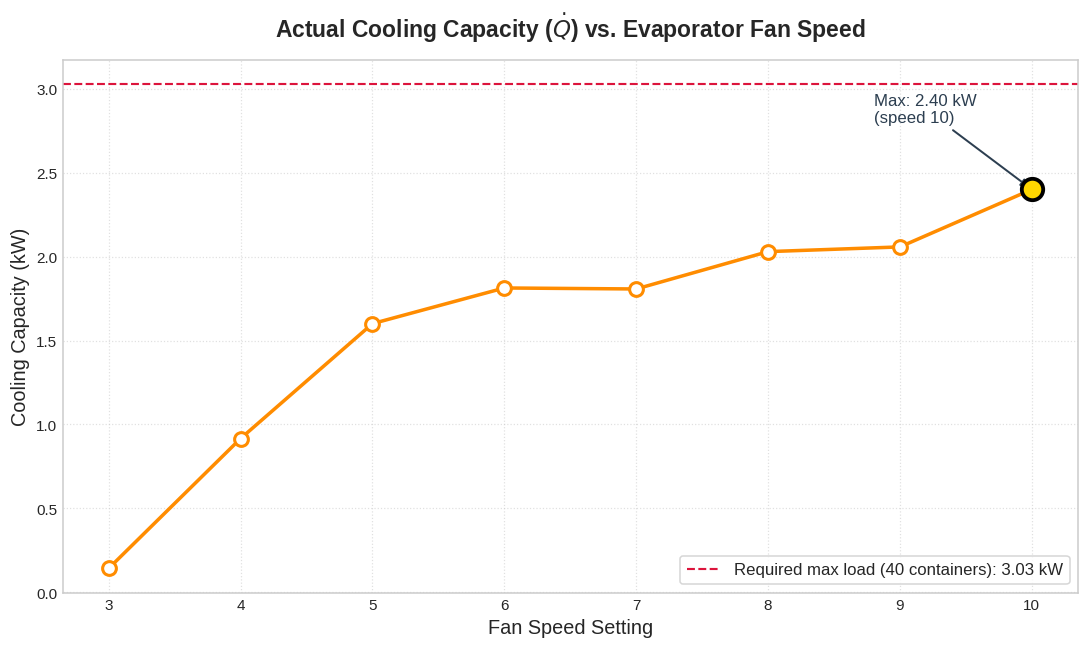

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────────────────────
# 1. Experimental Data (only fan speeds 3–10 have measurable airflow)
# ────────────────────────────────────────────────────────────────
data = {
    "fan_speed":   [3, 4, 5, 6, 7, 8, 9, 10],
    "T1_db_in":    [29.9, 30.0, 29.2, 29.2, 29.4, 29.0, 28.7, 29.4],  # Return Air DB (°C)
    "T2_wb_in":    [25.3, 24.9, 23.7, 23.3, 23.2, 23.1, 22.9, 23.2],  # Return Air WB (°C)
    "T5_db_out":   [24.3, 20.4, 20.8, 21.4, 21.5, 21.2, 21.3, 19.9],  # Exit DB (°C)
    "T6_wb_out":   [19.7, 16.6, 16.2, 18.0, 18.2, 17.6, 17.4, 16.5],  # Exit WB (°C)
    "V_in":        [0.6, 2.8, 5.6, 8.8, 9.3, 9.6, 9.8, 9.5]           # Intake velocity (m/s)
}

df = pd.DataFrame(data)

# ────────────────────────────────────────────────────────────────
# 2. Constants
# ────────────────────────────────────────────────────────────────
P_atm    = 101.325          # kPa
rho_air  = 1.184            # kg/m³ (more accurate at ~28–30°C than 1.2)
D_duct   = 0.11             # m (return air duct diameter)
A_duct   = np.pi * (D_duct / 2)**2   # Cross-sectional area (m²)

# ────────────────────────────────────────────────────────────────
# 3. Enthalpy function (kJ/kg dry air)
# ────────────────────────────────────────────────────────────────
def calculate_enthalpy(T_db, T_wb):
    """Specific enthalpy using approximate psychrometric relations."""
    # Saturation vapor pressure at wet bulb (kPa)
    P_swb = 0.61078 * np.exp((17.27 * T_wb) / (T_wb + 237.3))

    # Actual vapor pressure (psychrometric equation)
    P_v = P_swb - 0.000662 * P_atm * (T_db - T_wb)

    # Humidity ratio (kg/kg)
    w = 0.62194 * P_v / (P_atm - P_v)

    # Enthalpy (kJ/kg)
    h = 1.006 * T_db + w * (2501 + 1.86 * T_db)
    return h


# ────────────────────────────────────────────────────────────────
# 4. Apply calculations
# ────────────────────────────────────────────────────────────────
df['h_in_kJkg']  = df.apply(lambda r: calculate_enthalpy(r['T1_db_in'], r['T2_wb_in']), axis=1)
df['h_out_kJkg'] = df.apply(lambda r: calculate_enthalpy(r['T5_db_out'], r['T6_wb_out']), axis=1)

df['m_dot_kgs']  = rho_air * A_duct * df['V_in']
df['Q_dot_kW']   = df['m_dot_kgs'] * (df['h_in_kJkg'] - df['h_out_kJkg'])

# ────────────────────────────────────────────────────────────────
# 5. Results Table (clean print for report)
# ────────────────────────────────────────────────────────────────
print("Cooling Capacity vs Fan Speed")
print("───────────────────────────────────────────────")
print(df[['fan_speed', 'V_in', 'm_dot_kgs', 'h_in_kJkg', 'h_out_kJkg', 'Q_dot_kW']]
      .round({'V_in':2, 'm_dot_kgs':3, 'h_in_kJkg':1, 'h_out_kJkg':1, 'Q_dot_kW':2}))
print(f"\nDuct area used: {A_duct:.4f} m²")
print(f"Air density used: {rho_air} kg/m³")
print("───────────────────────────────────────────────\n")

# ────────────────────────────────────────────────────────────────
# 6. Visualization
# ────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6), dpi=110)

plt.plot(df['fan_speed'], df['Q_dot_kW'],
         marker='o', markersize=9, linewidth=2.3,
         color='darkorange', linestyle='-',
         markerfacecolor='white', markeredgecolor='darkorange', markeredgewidth=2)

# Reference line for required capacity
plt.axhline(y=3.03, color='crimson', linestyle='--', linewidth=1.4,
            label='Required max load (40 containers): 3.03 kW')

# Highlight maximum capacity point
max_idx = df['Q_dot_kW'].idxmax()
max_Q   = df['Q_dot_kW'].max()
max_speed = df.loc[max_idx, 'fan_speed']

plt.plot(max_speed, max_Q, 'o', ms=14, mec='black', mfc='gold', mew=2.5, zorder=10)

plt.annotate(f'Max: {max_Q:.2f} kW\n(speed {max_speed})',
             xy=(max_speed, max_Q),
             xytext=(max_speed-1.2, max_Q+0.4),
             fontsize=11, fontweight='medium',
             color='#2c3e50',
             arrowprops=dict(arrowstyle='-|>', color='#2c3e50', lw=1.3))

# Styling
plt.title('Actual Cooling Capacity ($\dot{Q}$) vs. Evaporator Fan Speed',
          fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Fan Speed Setting', fontsize=13)
plt.ylabel('Cooling Capacity (kW)', fontsize=13)

plt.xticks(df['fan_speed'])
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='lower right', fontsize=11, frameon=True)

plt.tight_layout()
plt.show()

# Preliminary Conclusions and Transition to Next Experiment

Based on the analysis of exit air temperatures ($T_5$, $T_6$) and the calculated heat removal rates ($\dot{Q}$) across fan speed settings, the following key observations and conclusions are drawn:

## 1. Fan Speed Optimization

- **Performance Peak**  
  The highest overall heat removal rate ($\dot{Q}$ in kW) occurs at the **maximum evaporator fan speed (Speed 10)**.

- **Exit Temperature Achievement**  
  Although air velocity ($V_{in}$) reached a slight peak at Speed 9, the **lowest exit temperatures** were recorded at **Speed 10**:  
  - $T_5$ (dry bulb) = **19.9 °C**  
  - $T_6$ (wet bulb) = **16.5 °C**  
  This indicates the most effective overall cooling of the supply air stream.

- **Mass Flow vs. Contact Time Trade-off**  
  At the highest fan speeds, the substantial increase in mass flow rate ($\dot{m}_a$) more than compensates for the reduced air–evaporator contact time, resulting in the **highest net cooling capacity**.

- **Comparison with Design Target**  
  The measured cooling capacity of the laboratory unit remains **below** the required values:  
  - Average case: **2.73 kW** (37.5 °C → 15 °C)  
  - Worst case: **3.03 kW** (40 °C → 15 °C)  
  → Current performance is **insufficient** for reliably meeting the 2-hour cooling requirement for 40 containers without modifications.

## 2. Next Experimental Phase: Closed-Door Cooling Rate Test

With the optimal fan speed now identified (Speed 10), the experiment will transition to evaluating the unit’s performance under realistic operating conditions.

### Objective
Determine the actual rate of temperature reduction ($\frac{dT}{dt}$) inside the closed cold room and assess whether the target storage temperature of **15 °C** can be achieved within the required **2-hour** window.

### Procedure
- Close the cold room door completely (simulate normal operation).  
- Operate the unit continuously at **maximum fan speed (Speed 10)**.  
- Start with the room at ambient laboratory temperature (~29–30 °C).  
- Record internal room temperature at regular intervals (e.g., every 5–10 minutes) using multiple temperature sensors placed at representative locations.

### Expected Data & Analysis
- Plot temperature vs. time to determine the average cooling rate.  
- Calculate time required to reach 15 °C.  
- Compare actual performance against the design requirement (bulk cooling from ~37.5 °C to 15 °C in ≤ 2 hours).  
- Identify whether additional heat gains (walls, infiltration) significantly reduce effective capacity.



# OBSERVATIONS

## Experiment 02: Closed-Door Cooling Rate Study

This phase evaluates the real-world pull-down performance of the laboratory cooling unit under closed-door conditions (simulating normal dairy storage operation).

### Experimental Setup & Conditions
- Evaporator fan speed fixed at the optimum value identified in Experiment 01: **Speed 10**  
- Constant air intake velocity: **$V_{in} = 9.5$ m/s**  
- Duct cross-sectional area: **$A \approx 0.0095$ m²** (circular duct, $D_1 = 0.11$ m)  
- Measurements recorded every **1 minute** for **15 minutes**  
- Sensors monitored:  
  - $T_3$: Evaporator inlet dry bulb temperature (°C)  
  - $T_4$: Evaporator inlet wet bulb temperature (°C)  
  - $T_5$: Evaporator exit dry bulb temperature (°C)  
  - $T_6$: Evaporator exit wet bulb temperature (°C)

### Recorded Temperature Data

| Time (min) | $T_3$ (°C) | $T_4$ (°C) | $T_5$ (°C) | $T_6$ (°C) |
|-----------|------------|------------|------------|------------|
| 1         | 27.4       | 19.9       | 20.3       | 16.4       |
| 2         | 27.0       | 19.6       | 20.2       | 16.4       |
| 3         | 26.7       | 19.3       | 20.0       | 16.2       |
| 4         | 26.4       | 18.9       | 19.8       | 16.1       |
| 5         | 26.1       | 18.7       | 19.7       | 16.0       |
| 6         | 25.9       | 18.5       | 19.5       | 15.8       |
| 7         | 25.7       | 18.3       | 19.3       | 15.6       |
| 8         | 25.5       | 18.2       | 19.2       | 15.5       |
| 9         | 25.4       | 18.0       | 18.9       | 15.4       |
| 10        | 25.2       | 17.9       | 18.8       | 15.3       |
| 11        | 25.1       | 17.7       | 18.7       | 15.2       |
| 12        | 24.9       | 17.6       | 18.6       | 15.0       |
| 13        | 24.8       | 17.5       | 18.4       | 15.0       |
| 14        | 24.6       | 17.4       | 18.4       | 14.9       |
| 15        | 24.5       | 17.3       | 18.2       | 14.8       |

**Quick visual trend:**  
- Inlet dry bulb ($T_3$) decreased from **27.4°C → 24.5°C** (≈2.9°C drop in 15 min)  
- Exit dry bulb ($T_5$) decreased from **20.3°C → 18.2°C** (≈2.1°C drop)  
- Wet bulb temperatures also show steady decline, indicating both sensible and latent cooling.

### Mathematical Framework – Instantaneous Cooling Rate

The following steps are used to calculate the **instantaneous cooling capacity** ($\dot{Q}_t$) at each time step:

**Step 1: Constant Mass Flow Rate**  
(using fixed velocity from Experiment 01)

$$
\dot{m}_a = \rho \cdot A \cdot V_{in}
$$

Where:
- $\rho \approx 1.2$ kg/m³ (air density)  
- $A \approx 0.0095$ m² (duct area)  
- $V_{in} = 9.5$ m/s  

**→ $\dot{m}_a$ remains constant throughout this experiment.**

**Step 2: Specific Enthalpy at Each Time Step**  
For every time $t$ (1 to 15 min):

- Inlet enthalpy $h_{in,t}$ → calculated from $T_{3,t}$ (DB) and $T_{4,t}$ (WB)  
- Outlet enthalpy $h_{out,t}$ → calculated from $T_{5,t}$ (DB) and $T_{6,t}$ (WB)  

(Use the same psychrometric enthalpy function as in Experiment 01)

**Step 3: Instantaneous Heat Removal Rate**

$$
\dot{Q}_t = \dot{m}_a \cdot (h_{in,t} - h_{out,t}) \quad \text{(kW)}
$$

